#Product being purchased through an advertisement on social media. We will be predicting the value of Purchased by considering gender, age and salary

#Mount Google Drive

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#Import Libraries

In [3]:
import numpy as np
import pandas as pd
import math as mt
import random

#Load Data

In [4]:
data = pd.read_csv("dataset.csv")
data.head()

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500,status
0,1.0,2.2493,4.6685,9.0,1.0,4.7500,1.0,1
1,1.0,5.1260,7.0055,5.0,2.0,4.0000,1.0,1
2,1.0,1.0329,1.4575,5.0,1.0,3.3333,1.0,1
3,0.0,3.1315,6.0027,2.0,1.0,1.0000,1.0,1
4,0.0,0.0000,0.0384,3.0,1.0,3.0000,1.0,0


In [5]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [6]:
sample_outliers_labels	 = detect_outliers_zscore(data['labels'])
sample_outliers_age_first_funding_year	 = detect_outliers_zscore(data['age_first_funding_year'])
sample_outliers_age_first_milestone_year = detect_outliers_zscore(data['age_first_milestone_year'])
sample_outliers_relationships= detect_outliers_zscore(data['relationships'])
sample_outliers_milestones = detect_outliers_zscore(data['milestones'])
sample_outliers_avg_participants = detect_outliers_zscore(data['avg_participants'])
sample_outliers_is_top500	 = detect_outliers_zscore(data['is_top500'])
sample_outliers_status = detect_outliers_zscore(data['status'])



print("Outliers in labels column from Z-scores method: ", sample_outliers_labels)
print("Outliers in age_first_funding_year column from Z-scores method: ", sample_outliers_age_first_funding_year	)
print("Outliers in age_first_milestone_year column from Z-scores method: ", sample_outliers_age_first_milestone_year)
print("Outliers in relationships column from Z-scores method: ", sample_outliers_relationships)
print("Outliers in milestones column from Z-scores method: ", sample_outliers_milestones)
print("Outliers in avg_participants column from Z-scores method: ", sample_outliers_avg_participants)
print("Outliers in is_top500	 column from Z-scores method: ", sample_outliers_is_top500	)
print("Outliers in status column from Z-scores method: ", sample_outliers_status)


Outliers in labels column from Z-scores method:  [20.8055, 10.7589, 10.5315, 11.3342, 16.4192, 11.4329, 10.9068, 16.9863, -9.0466, 10.3644, 21.8959, 10.4247, 10.8795, 11.1452, -14.1699, 12.5041, 16.663, -6.0466, 13.011, 24.6849, 15.4986, -7.0055, 37.0, 37.0, 30.0, 33.0, 32.0, 57.0, 35.0, 45.0, 35.0, 31.0, 63.0, 30.0, 42.0, 37.0, 38.0, 30.0, 30.0, 35.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 9.5, 9.0, 10.0, 9.0, 9.0, 9.5, 12.5, 8.5, 10.0, 9.3333, 9.0, 9.0, 11.0, 9.0, 16.0, 11.5, 8.6667, 8.5, 8.5, 9.0]
Outliers in age_first_funding_year column from Z-scores method:  [20.8055, 10.7589, 10.5315, 11.3342, 16.4192, 11.4329, 10.9068, 16.9863, -9.0466, 10.3644, 21.8959, 10.4247, 10.8795, 11.1452, -14.1699, 12.5041, 16.663, -6.0466, 13.011, 24.6849, 15.4986, -7.0055, 37.0, 37.0, 30.0, 33.0, 32.0, 57.0, 35.0, 45.0, 35.0, 31.0, 63.0, 30.0, 42.0, 37.0, 38.0, 30.0, 30.0, 35.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 9.5, 9.0, 10.0, 9.0, 9.0, 9.5, 12.5, 8.5, 10.0, 9.3333, 9.0, 9.0, 11.0, 9.0, 16.0, 11.5, 8.6

In [7]:
from scipy.stats import zscore
zlabels	 = np.abs(zscore(data['labels']))
zage_first_funding_year = np.abs(zscore(data['age_first_funding_year']))
zage_first_milestone_year = np.abs(zscore(data['age_first_milestone_year']))
zrelationships = np.abs(zscore(data['relationships']))
zmilestones = np.abs(zscore(data['milestones']))
zavg_participants = np.abs(zscore(data['avg_participants']))
zis_top500 = np.abs(zscore(data['is_top500']))
zstatus = np.abs(zscore(data['status']))


data['Zscorelabels'] = zlabels
data['Zscoreage_first_funding_year'] = zage_first_funding_year
data['Zscoreage_first_milestone_year'] = zage_first_milestone_year
data['Zscorerelationships'] = zrelationships
data['Zscoremilestones'] = zmilestones
data['Zscoreavg_participants'] = zavg_participants
data['Zscoreis_top500'] = zis_top500
data['Zscorestatus'] = zstatus





outliers_labels=len(data[data['Zscorelabels']>3])
outliers_age_first_funding_year=len(data[data['Zscoreage_first_funding_year']>3])
outliers_age_first_funding_year=len(data[data['Zscoreage_first_milestone_year']>3])
outliers_relationships=len(data[data['Zscorerelationships']>3])
outliers_milestones=len(data[data['Zscoremilestones']>3])
outliers_avg_participants=len(data[data['Zscoreavg_participants']>3])
outliers_is_top500=len(data[data['Zscoreis_top500']>3])
outliers_status=len(data[data['Zscorestatus']>3])


data_z = data[data['Zscorelabels']<3]
data_z = data[data['Zscoreage_first_funding_year']<3]
data_z = data[data['Zscoreage_first_milestone_year']<3]
data_z = data[data['Zscorerelationships']<3]
data_z = data[data['Zscoremilestones']<3]
data_z = data[data['Zscoreavg_participants']<3]
data_z = data[data['Zscoreis_top500']<3]
data_z = data[data['Zscorestatus']<3]




data=data_z.drop(['Zscorelabels','Zscoreage_first_funding_year','Zscoreage_first_milestone_year','Zscorerelationships','Zscoremilestones','Zscoreavg_participants','Zscoreis_top500','Zscorestatus'], axis=1)
data

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500,status
0,1.0,2.2493,4.6685,9.0,1.0,4.7500,1.0,1
1,1.0,5.1260,7.0055,5.0,2.0,4.0000,1.0,1
2,1.0,1.0329,1.4575,5.0,1.0,3.3333,1.0,1
3,0.0,3.1315,6.0027,2.0,1.0,1.0000,1.0,1
4,0.0,0.0000,0.0384,3.0,1.0,3.0000,1.0,0
...,...,...,...,...,...,...,...,...
918,0.0,0.5178,0.5808,1.0,1.0,2.6667,1.0,1
919,0.0,7.2521,6.0027,5.0,1.0,8.0000,1.0,0
920,1.0,8.4959,9.0055,12.0,2.0,1.0000,1.0,0
921,1.0,0.7589,0.7589,4.0,1.0,3.0000,1.0,1


In [8]:
print(data.isnull().sum())

labels                        1
age_first_funding_year        0
age_first_milestone_year    152
relationships                 1
milestones                    1
avg_participants              1
is_top500                     1
status                        0
dtype: int64


In [9]:
m1=data['labels'].mean()
m2=data['age_first_funding_year'].mean()
m3=data['age_first_milestone_year'].mean()
m4=data['relationships'].mean()
m5=data['milestones'].mean()
m6=data['avg_participants'].mean()
m7=data['is_top500'].mean()
m8=data['status'].mean()



data['labels'].fillna(value=m1, inplace=True)
data['age_first_funding_year'].fillna(value=m2, inplace=True)
data['age_first_milestone_year'].fillna(value=m3, inplace=True)
data['relationships'].fillna(value=m4, inplace=True)
data['milestones'].fillna(value=m5, inplace=True)
data['avg_participants'].fillna(value=m6, inplace=True)
data['is_top500'].fillna(value=m7, inplace=True)
data['status'].fillna(value=m8, inplace=True)


data

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500,status
0,1.000000,2.2493,4.6685,9.000000,1.000000,4.75000,1.000000,1
1,1.000000,5.1260,7.0055,5.000000,2.000000,4.00000,1.000000,1
2,1.000000,1.0329,1.4575,5.000000,1.000000,3.33330,1.000000,1
3,0.000000,3.1315,6.0027,2.000000,1.000000,1.00000,1.000000,1
4,0.000000,0.0000,0.0384,3.000000,1.000000,3.00000,1.000000,0
...,...,...,...,...,...,...,...,...
918,0.000000,0.5178,0.5808,1.000000,1.000000,2.66670,1.000000,1
919,0.000000,7.2521,6.0027,5.000000,1.000000,8.00000,1.000000,0
920,1.000000,8.4959,9.0055,12.000000,2.000000,1.00000,1.000000,0
921,1.000000,0.7589,0.7589,4.000000,1.000000,3.00000,1.000000,1


#Data Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['age_first_funding_year', 'age_first_milestone_year','relationships','milestones','avg_participants']
data[num_vars] = scaler.fit_transform(data[num_vars])

data

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500,status
0,1.000000,0.365061,0.484841,0.142857,0.12500,0.250000,1.000000,1
1,1.000000,0.458030,0.544988,0.079365,0.25000,0.200000,1.000000,1
2,1.000000,0.325749,0.402200,0.079365,0.12500,0.155553,1.000000,1
3,0.000000,0.393572,0.519179,0.031746,0.12500,0.000000,1.000000,1
4,0.000000,0.292368,0.365677,0.047619,0.12500,0.133333,1.000000,0
...,...,...,...,...,...,...,...,...
918,0.000000,0.309102,0.379636,0.015873,0.12500,0.111113,1.000000,1
919,0.000000,0.526742,0.519179,0.079365,0.12500,0.466667,1.000000,0
920,1.000000,0.566939,0.596462,0.190476,0.25000,0.000000,1.000000,0
921,1.000000,0.316894,0.384220,0.063492,0.12500,0.133333,1.000000,1


#Data Split

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)


#Dividing the training data set into X and Y


In [12]:
y_train = df_train.pop('status')
X_train = df_train
y_test = df_test.pop('status')
X_test = df_test

#Model Training

In [13]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)


LogisticRegression()

In [14]:
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

In [15]:
print(" Training Accuracy",lr_model.score(X_train, y_train))
print(" Testing Accuracy",lr_model.score(X_test, y_test))

 Training Accuracy 0.6393188854489165
 Testing Accuracy 0.6678700361010831


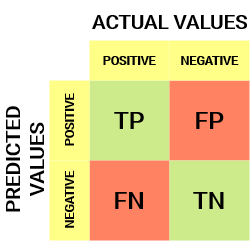

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[  2,  92],
       [  0, 183]], dtype=int64)

In [17]:
confusion_matrix(y_train, y_pred_train)

array([[  0, 232],
       [  1, 413]], dtype=int64)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[ 27  67]
 [ 37 146]]


C:\Users\Sherlock\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.6245487364620939

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[  0  94]
 [  0 183]]


0.6606498194945848

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

[[ 47  47]
 [ 49 134]]
0.6534296028880866


#Precision tells us how many of the correctly predicted cases actually turned out to be positive.

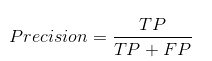

#Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

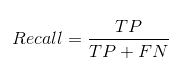

#F1-Score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value:

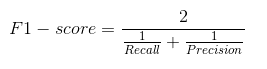

F1-score is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics.

# Save Model

In [21]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(lr_model, open(filename, 'wb'))

# Deploy Model

In [22]:
list_of_columns = data.columns
input_data=pd.DataFrame(columns=list_of_columns)
input_data.drop(['status'], axis='columns', inplace=True)

input_data.at[0, 'labels'] = float(input('enter label'))
input_data.at[0, 'age_first_funding_year'] = float(input('enter age_first_funding_year'))
input_data.at[0, 'age_first_milestone_year'] = float(input('enter age_first_milestone_year'))
input_data.at[0, 'relationships'] = float(input('enter relationships'))
input_data.at[0, 'milestones'] = float(input('enter milestones'))
input_data.at[0, 'avg_participants'] = float(input('enter avg_participants'))
input_data.at[0, 'is_top500'] = float(input('enter is_top500'))


# Defining the map function
#def binary_map(x):
 #   return x.map({'Male': 1, "Female": 0})

# Applying the function to the housing list
#input_data[varlist] = input_data[varlist].apply(binary_map)


input_data['labels']=(input_data['labels']-data['labels'].min())/(data['labels'].max()-data['labels'].min())
input_data['age_first_funding_year']=(input_data['age_first_funding_year']-data['age_first_funding_year'].min())/(data['age_first_funding_year'].max()-data['age_first_funding_year'].min())
input_data['age_first_milestone_year']=(input_data['age_first_milestone_year']-data['age_first_milestone_year'].min())/(data['age_first_milestone_year'].max()-data['age_first_milestone_year'].min())
input_data['relationships']=(input_data['relationships']-data['relationships'].min())/(data['relationships'].max()-data['relationships'].min())
input_data['milestones']=(input_data['milestones']-data['milestones'].min())/(data['milestones'].max()-data['milestones'].min())
input_data['avg_participants']=(input_data['avg_participants']-data['avg_participants'].min())/(data['avg_participants'].max()-data['avg_participants'].min())
input_data['is_top500']=(input_data['is_top500']-data['is_top500'].min())/(data['is_top500'].max()-data['is_top500'].min())
y_pred =  lr_model.predict(input_data)

if(y_pred==1):
  print('SUCCESS')
else:
  print('FAIL')

SUCCESS


In [23]:
input_data

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [33]:
data

,labels,age_first_funding_year,age_first_milestone_year,relationships,milestones,avg_participants,is_top500,status
0,1.000000,0.365061,0.484841,0.142857,0.12500,0.250000,1.000000,1
1,1.000000,0.458030,0.544988,0.079365,0.25000,0.200000,1.000000,1
2,1.000000,0.325749,0.402200,0.079365,0.12500,0.155553,1.000000,1
3,0.000000,0.393572,0.519179,0.031746,0.12500,0.000000,1.000000,1
4,0.000000,0.292368,0.365677,0.047619,0.12500,0.133333,1.000000,0
...,...,...,...,...,...,...,...,...
918,0.000000,0.309102,0.379636,0.015873,0.12500,0.111113,1.000000,1
919,0.000000,0.526742,0.519179,0.079365,0.12500,0.466667,1.000000,0
920,1.000000,0.566939,0.596462,0.190476,0.25000,0.000000,1.000000,0
921,1.000000,0.316894,0.384220,0.063492,0.12500,0.133333,1.000000,1


In [48]:
data.columns

Index(['labels', 'age_first_funding_year', 'age_first_milestone_year',
       'relationships', 'milestones', 'avg_participants', 'is_top500',
       'status'],
      dtype='object')

In [29]:
print(data['labels'].min())
print(data['labels'].max())

0.0
1.0


In [32]:
print(data['age_first_funding_year'].min())
print(data['age_first_funding_year'].max())

0.0
1.0


In [37]:
print(data['is_top500'].min())
print(data['is_top500'].max())


0.0
1.0


In [41]:
print(data['relationships'].min())
print(data['relationships'].max())

0.0
1.0


In [43]:
print(data['milestones'].min())
print(data['milestones'].max())

0.0
1.0


In [44]:
print(data['avg_participants'].min())
print(data['avg_participants'].max())

0.0
1.0


In [45]:
print(data['age_first_milestone_year'].min())
print(data['age_first_milestone_year'].max())

0.0
1.0


# Thank you